In [ ]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

IMPORT WITH FIXING THE STANDARD AND UNEXPECTED MISSING VALUES

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [ ]:
df.shape

(212331, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [ ]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [ ]:
df.tail()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na
212330,84X717,Icahn Charter School,K-8,U.S. History and Government,2015,1,s,s,s,s,s,s,s,na,na


In [ ]:
df.isnull().sum()

School DBN                      0
School Name                     0
School Level                    0
Regents Exam                   10
Year                            0
Total Tested                    0
Mean Score                      0
Number Scoring Below 65         0
Percent Scoring Below 65        0
Number Scoring 65 or Above      0
Percent Scoring 65 or Above     0
Number Scoring 80 or Above      0
Percent Scoring 80 or Above     0
Number Scoring CR               0
Percent Scoring CR              0
dtype: int64

In [ ]:
missing_values = ["s", "na"]
nycrts = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', na_values = missing_values)

In [ ]:
nycrts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School DBN                   212331 non-null  object 
 1   School Name                  212331 non-null  object 
 2   School Level                 212331 non-null  object 
 3   Regents Exam                 212321 non-null  object 
 4   Year                         212331 non-null  int64  
 5   Total Tested                 212331 non-null  int64  
 6   Mean Score                   137109 non-null  float64
 7   Number Scoring Below 65      137109 non-null  float64
 8   Percent Scoring Below 65     137109 non-null  float64
 9   Number Scoring 65 or Above   137109 non-null  float64
 10  Percent Scoring 65 or Above  137109 non-null  float64
 11  Number Scoring 80 or Above   137109 non-null  float64
 12  Percent Scoring 80 or Above  137109 non-null  float64
 13 

In [ ]:
nycrts.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [ ]:
drop_cols = ['Number Scoring Below 65','Number Scoring 65 or Above','Number Scoring 80 or Above', 'Number Scoring CR', 'Percent Scoring CR'] 
nycrts.drop(drop_cols, inplace = True, axis=1)

In [ ]:
nycrts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School DBN                   212331 non-null  object 
 1   School Name                  212331 non-null  object 
 2   School Level                 212331 non-null  object 
 3   Regents Exam                 212321 non-null  object 
 4   Year                         212331 non-null  int64  
 5   Total Tested                 212331 non-null  int64  
 6   Mean Score                   137109 non-null  float64
 7   Percent Scoring Below 65     137109 non-null  float64
 8   Percent Scoring 65 or Above  137109 non-null  float64
 9   Percent Scoring 80 or Above  137109 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 16.2+ MB


In [ ]:
qrts_28 = nycrts[nycrts['School DBN'].str.contains('28Q')]
set(qrts_28['School DBN'])

{'28Q008',
 '28Q072',
 '28Q157',
 '28Q167',
 '28Q190',
 '28Q217',
 '28Q284',
 '28Q287',
 '28Q310',
 '28Q325',
 '28Q328',
 '28Q332',
 '28Q338',
 '28Q350',
 '28Q440',
 '28Q505',
 '28Q620',
 '28Q680',
 '28Q686',
 '28Q687',
 '28Q690',
 '28Q896'}

In [ ]:
qrts_28.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Percent Scoring Below 65',
       'Percent Scoring 65 or Above', 'Percent Scoring 80 or Above'],
      dtype='object')

In [ ]:
qrts_28 = nycrts[nycrts['School DBN'].str.contains('28Q')]
set(qrts_28['School DBN'])

{'28Q008',
 '28Q072',
 '28Q157',
 '28Q167',
 '28Q190',
 '28Q217',
 '28Q284',
 '28Q287',
 '28Q310',
 '28Q325',
 '28Q328',
 '28Q332',
 '28Q338',
 '28Q350',
 '28Q440',
 '28Q505',
 '28Q620',
 '28Q680',
 '28Q686',
 '28Q687',
 '28Q690',
 '28Q896'}

In [ ]:
qrts_28.groupby(['School Name','Year'])['Mean Score'].mean().sort_values(ascending=True)

School Name                                         Year
The Emerson School                                  2017    59.204762
High School for Law Enforcement and Public Safety   2015    60.911236
Queens Satellite High School for Opportunity        2017    61.063636
High School for Law Enforcement and Public Safety   2017    61.217284
                                                    2016    61.609901
                                                              ...    
Queens High School for the Sciences at York Colleg  2015    88.122535
                                                    2016    88.340741
J.H.S. 190 Russell Sage                             2016    88.872222
Queens High School for the Sciences at York Colleg  2017    89.943056
J.H.S. 190 Russell Sage                             2017    91.511111
Name: Mean Score, Length: 63, dtype: float64

NYC Schools District 28Q Rankings by averaging the Mean of combinded Regents Exams testing scores. 

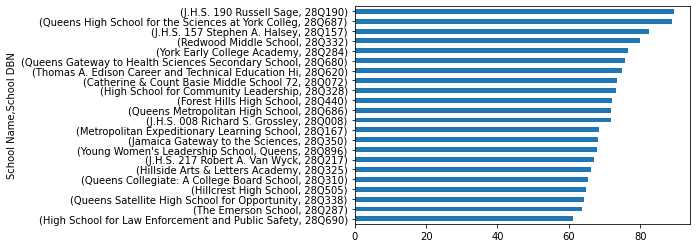

In [ ]:
qrts_28.groupby(['School Name', 'School DBN'])['Mean Score'].mean().sort_values(ascending=True).plot(kind='barh', x=['School Name'], y=['Mean Score'])

Cross comparison of Forrest Hills High School with Queens Metropolitan High School

In [ ]:
qrts_hs = qrts_28[(qrts_28['School Name'] == 'Forest Hills High School') | (qrts_28['School Name'] == 'Queens Metropolitan High School') | (qrts_28['Year'] == '2017')]

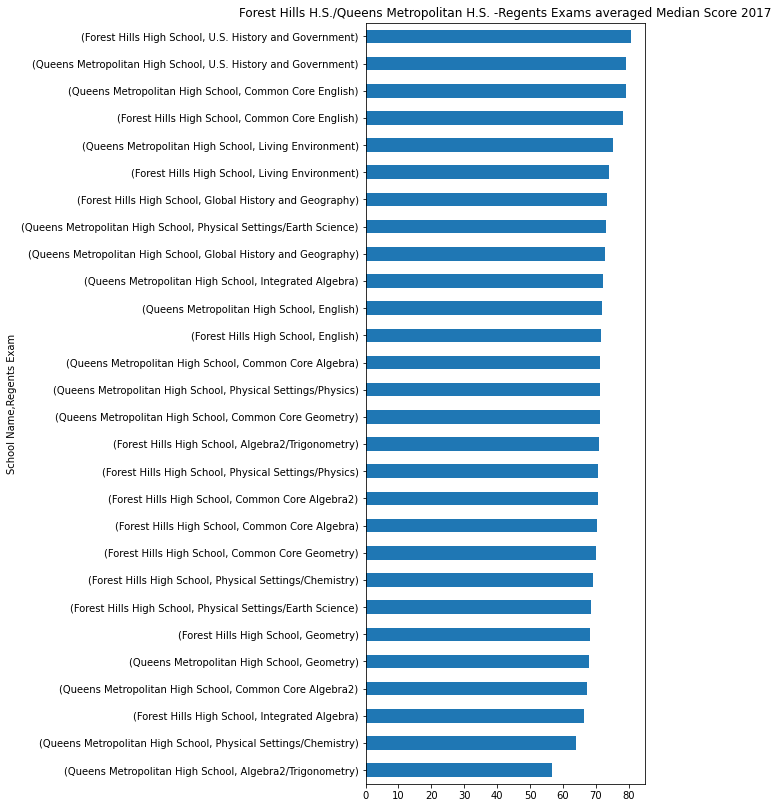

In [ ]:
qrts_hs.groupby(['School Name','Regents Exam'])['Mean Score'].mean().sort_values().plot(kind='barh', figsize=(5,14), x=['School Name'], y=['Mean Score'], title='Forest Hills H.S./Queens Metropolitan H.S. -Regents Exams averaged Median Score 2017')

In [ ]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']